In [1]:
import sys
from tensorflow import keras
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from ensemble import Ensemble
import tensorflow.keras.backend as K

2022-02-10 17:12:19.171165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 17:12:19.171206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
with open("./settings/model/config.yaml", 'r') as stream:
        config =yaml.load(stream ,Loader=  yaml.FullLoader)

K.clear_session()
sigma_index_lst = [0,1]
epoch_num = 2
model = Ensemble(mode='test', model_kind='rnn_cnn', sigma_lst=sigma_index_lst,
                     default_n=20, epoch_num=epoch_num, epoch_min=100, epoch_step=50, **config)
model.train_model_outer()


2022-02-10 17:12:28.266788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-10 17:12:28.266841: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-10 17:12:28.266859: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sky-ubuntu): /proc/driver/nvidia/version does not exist
2022-02-10 17:12:28.267101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1869, 1, 4)
Input shape: (1869, 1, 4)
Load weight from ./log/model/


In [4]:
dt = pd.read_csv('./data/test.csv')
print(dt.shape)

dr = pd.read_csv('./data/SonTay.csv')
print(dr.shape)



(1000, 6)
(5000, 6)


In [5]:
Q, H, Q_, H_ =[], [], [], []

for i in range(1000): 
    model.data = model.generate_data_vp(data_ = pd(dr.iloc[-5000:]))
    q_pred, h_pred = model.prediction_vp()
    Q.append(dt.iloc[i]['Q'])
    H.append(dt.iloc[i]['H'])
    Q_.append(q_pred)
    H_.append(h_pred)
    dr = dr.append(dt.iloc[i], ignore_index = True)
    print(i)
    

/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


0


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


1


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


2


/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Q_ssa'] = Q_ssa
/home/sky/Desktop/VIETPHAM_2021/Hackaithon_10MD_3day/utils/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['H_ssa'] = H_ssa


3


In [17]:
print('q, q_, h, h_')
for i in range(100):
    print(Q[i], Q_[i], H[i], H_[i])

q, q_, h, h_
37327.15 37235.70752397761 37245.44 37180.61405598454
37327.15 37253.89015318884 37250.64 37198.2278809285
37283.0 37270.62970331848 37251.18 37214.25652017889
37346.58 37280.476886702265 37253.92 37224.6712620948
37325.69 37292.04025659672 37300.93 37235.79894399139
37355.16 37302.29260865468 37312.57 37246.366351428675
37411.24 37315.14167892127 37328.55 37259.27872330319
37417.07 37336.64703740441 37391.84 37278.93997965239
37418.16 37362.68965437208 37400.0 37303.894135077615
37420.0 37387.48381779177 37399.55 37328.489828550315
37415.16 37406.546887486205 37380.0 37348.24058813288
37439.31 37418.57367439945 37379.25 37361.541026389685
37467.4 37428.45149836697 37426.83 37372.05095999942
37432.83 37438.957738545774 37408.0 37388.82075994712
37459.6 37444.74415423361 37417.74 37399.1577021474
37459.94 37451.890267767085 37447.57 37408.139895357366
37460.29 37458.42704050526 37421.49 37417.94912739342
37467.4 37463.221035149276 37422.39 37423.84802186413
37463.47 37468.0

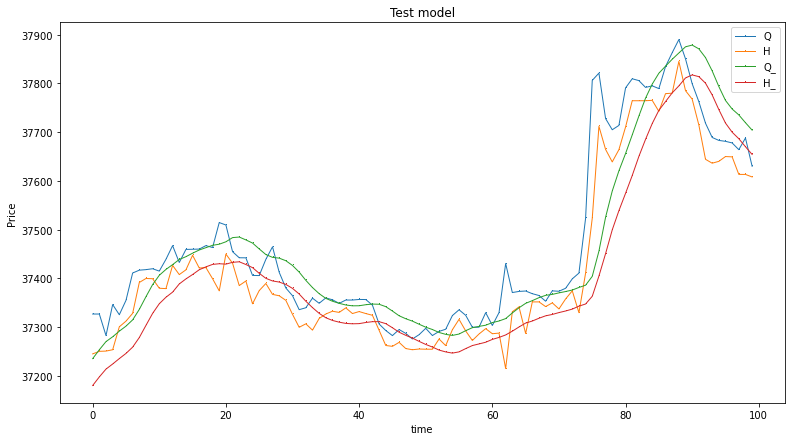

<Figure size 432x288 with 0 Axes>

In [5]:
m, n = 0, 100
plt.subplots(1, figsize=(13, 7))
plt.plot(Q[m:n],marker=',', linewidth='1', label="Q" )
plt.plot(H[m:n],marker=',', linewidth='1', label="H" )
plt.plot(Q_[m:n],marker=',', linewidth='1', label="Q_" )
plt.plot(H_[m:n],marker=',', linewidth='1', label="H_" )




plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

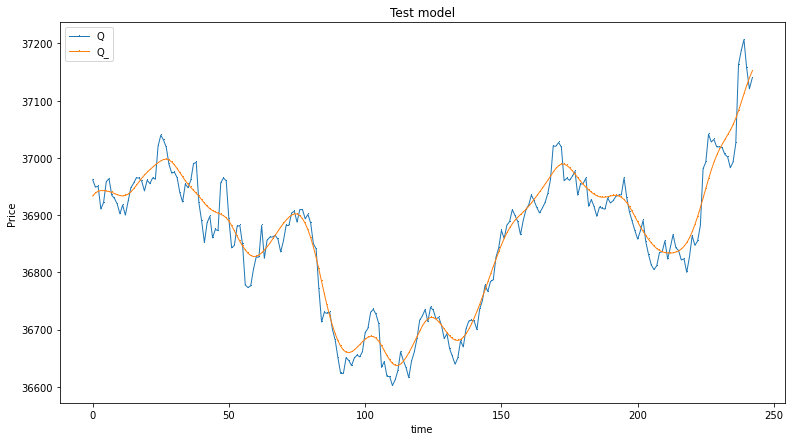

<Figure size 432x288 with 0 Axes>

In [15]:
q_r_e = pd.read_csv('./log/data_analysis/predict_val_0.csv')
m, n = 0, 250
plt.subplots(1, figsize=(13, 7))
plt.plot(q_r_e['real_q'][m:n],marker=',', linewidth='1', label="Q" )
plt.plot(q_r_e['ensemble_q'][m:n],marker=',', linewidth='1', label="Q_" )


plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

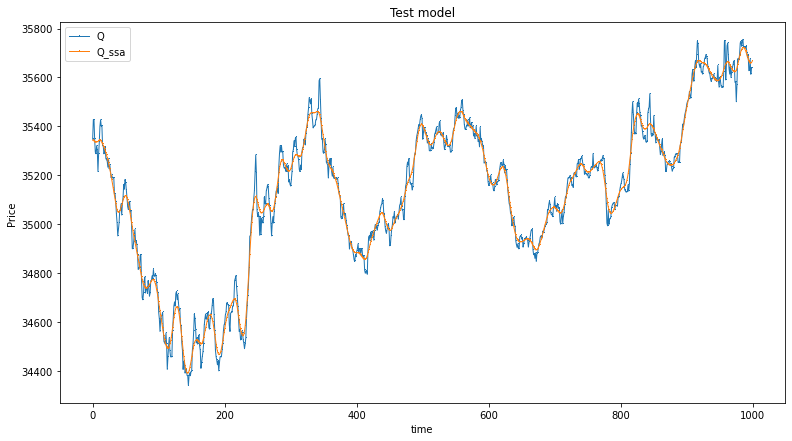

<Figure size 432x288 with 0 Axes>

In [21]:
q_ssa = pd.read_csv('./data/modified_data1.csv')
m, n = 0,1000
plt.subplots(1, figsize=(13, 7))
plt.plot(q_ssa['Q'][m:n],marker=',', linewidth='1', label="Q" )
plt.plot(q_ssa['Q_ssa'][m:n],marker=',', linewidth='1', label="Q_ssa" )
plt.plot(q_ssa['H'][m:n],marker=',', linewidth='1', label="H" )
plt.plot(q_ssa['H_ssa'][m:n],marker=',', linewidth='1', label="H_ssa" )


plt.xlabel('time')
plt.ylabel('Price')
plt.title('Test model')
plt.legend()
plt.show()
plt.savefig('./data/test')

In [22]:
root = pd.read_csv('./data/root.csv')
print(root.shape)

(5000, 6)


In [31]:
my_ohlc_data = np.array(root)
my_ohlc_data[0,4]


35347.39

In [42]:
q_s = np.array(q_ssa)

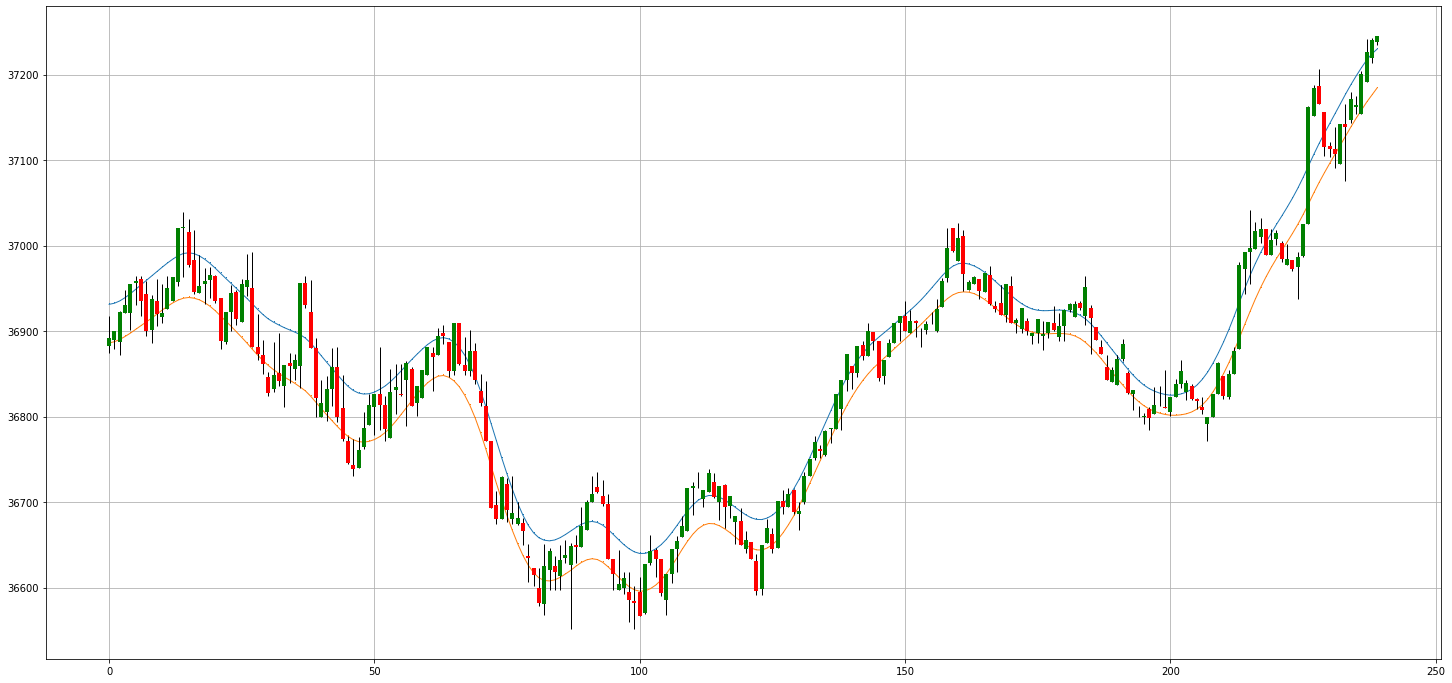

In [46]:
def ohlc_plot(Data, window, name):
    plt.subplots(1, figsize=(25, 12))
    Chosen = Data[-window:, ]
    plt.plot(q_s[-window:, 2],marker=',', linewidth='1', label="Q_ssa" )
    plt.plot(q_s[-window:, 3],marker=',', linewidth='1', label="H_ssa" )
    for i in range(len(Chosen)):
 
        plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 2], color = 'black', linewidth = 1)
        
        if Chosen[i, 4] > Chosen[i, 1]:
            color_chosen = 'green'
            plt.vlines(x = i, ymin = Chosen[i, 1], ymax = Chosen[i, 4], color = color_chosen, linewidth = 4)
        if Chosen[i, 4] < Chosen[i, 1]:
            color_chosen = 'red'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
                    
        if Chosen[i, 4] == Chosen[i, 1]:
            color_chosen = 'black'
            plt.vlines(x = i, ymin = Chosen[i, 4], ymax = Chosen[i, 1], color = color_chosen, linewidth = 4)  
          
    plt.grid()
    plt.title(name)
ohlc_plot(my_ohlc_data, 240, '')

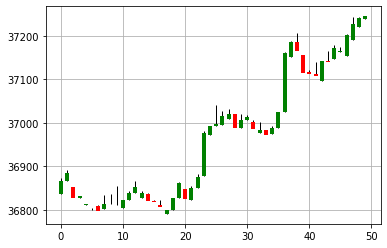

In [33]:
ohlc_plot(my_ohlc_data, 50, '')